In [2]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import sklearn.decomposition
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../peptidome.mplstyle')

from lib import *

In [3]:
counters = [count_kmers_proteome(human, k, clean=True) for k in range(1, 10)]

In [16]:
entropies = np.array([entropy(normalize(c), base=2) for i, c in enumerate(counters)])


In [5]:
entropies_gb = np.array([entropy_grassberger(np.asarray(list(c.values())), base=2) for i, c in enumerate(counters)])


In [6]:
entropies_nsb = np.array([entropy_nsb(np.asarray(list(c.values())), base=2) for i, c in enumerate(counters)])


In [12]:
def coincidence_prob(counter, size=int(1e7)):
    s = np.random.choice(np.asarray(list(counter.keys())), size=size,
                 p=normalize(counter))
    return np.mean(s[:len(s)//2] == s[len(s)//2:])

In [13]:
min_entropies = [-np.log2(coincidence_prob(c)) for c in counters]

<ipython-input-13-a9a7148545bd>:1: RuntimeWarning: divide by zero encountered in log2
  min_entropies = [-np.log2(coincidence_prob(c)) for c in counters]


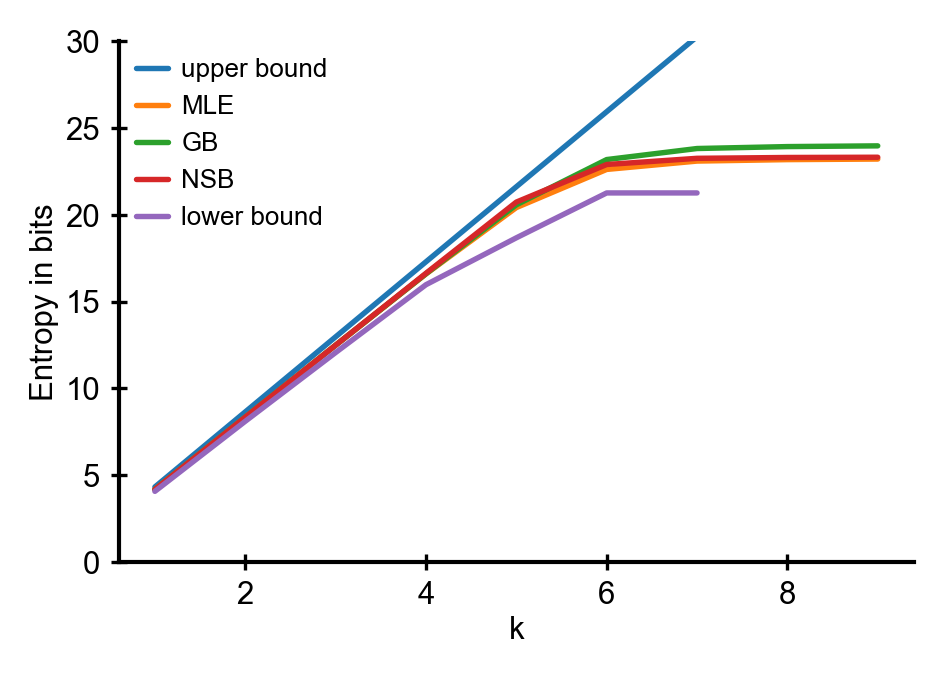

In [17]:
ks = np.arange(1, len(entropies)+1)
plt.plot(ks, np.log2(20)*ks, label='upper bound')
plt.plot(ks, entropies, label='MLE')
plt.plot(ks, entropies_gb, label='GB')
plt.plot(ks, entropies_nsb, label='NSB')
plt.plot(ks, min_entropies, label='lower bound')
plt.xlabel('k')
plt.ylim(0, 30)
plt.ylabel('Entropy in bits')
plt.legend()

(4.1, 4.2)

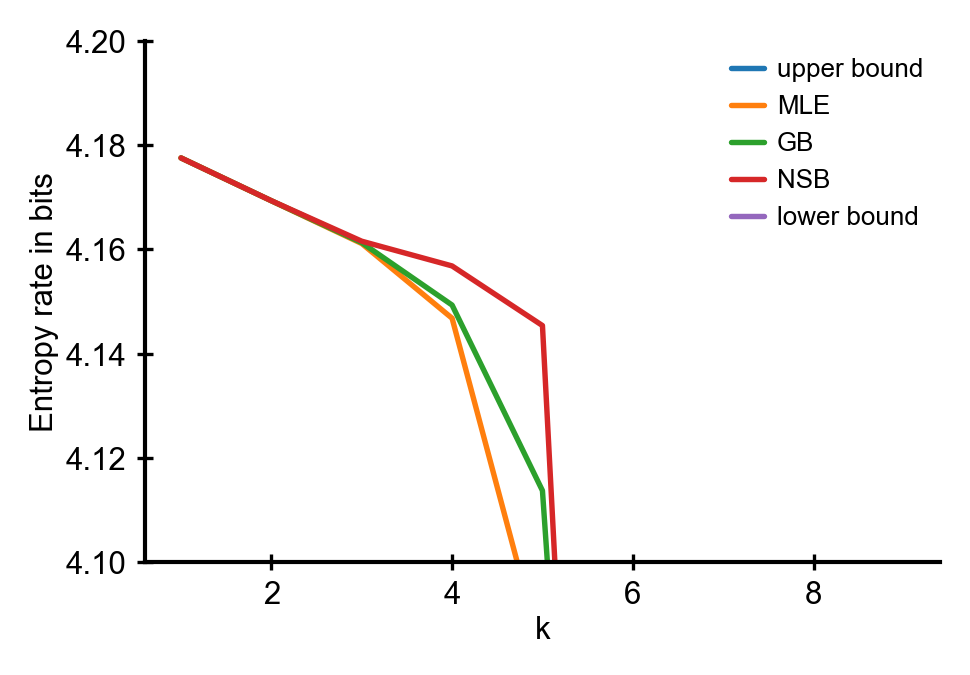

In [37]:
plt.plot(ks, np.ones_like(ks)*np.log2(20), label='upper bound')
plt.plot(ks, entropies/ks, label='MLE')
plt.plot(ks, entropies_gb/ks, label='GB')
plt.plot(ks, entropies_nsb/ks, label='NSB')
plt.plot(ks, min_entropies/ks, label='lower bound')
plt.xlabel('k')
plt.ylabel('Entropy rate in bits')
plt.legend()
plt.ylim(4.1, 4.2)

In [43]:
models = ['uniform', 'independent', 'ncov', 'nskew', 'nskewfcov']
ks_model = np.arange(4, 12, 1)
entropies_all = {}
for i, model in enumerate(models):
    entropies_model = []
    for k in ks_model:
        if model == 'uniform':
            S = k*np.log(20)
        else:
            S = np.float(pd.read_csv('../maxent/data/Human_{model}_k{k}_entropy.csv'.format(model=model, k=k),
                           header=None, index_col=0).loc['S'])
        entropies_model.append(S)
    entropies_all[model] = np.array(entropies_model)

(4.12, 4.2)

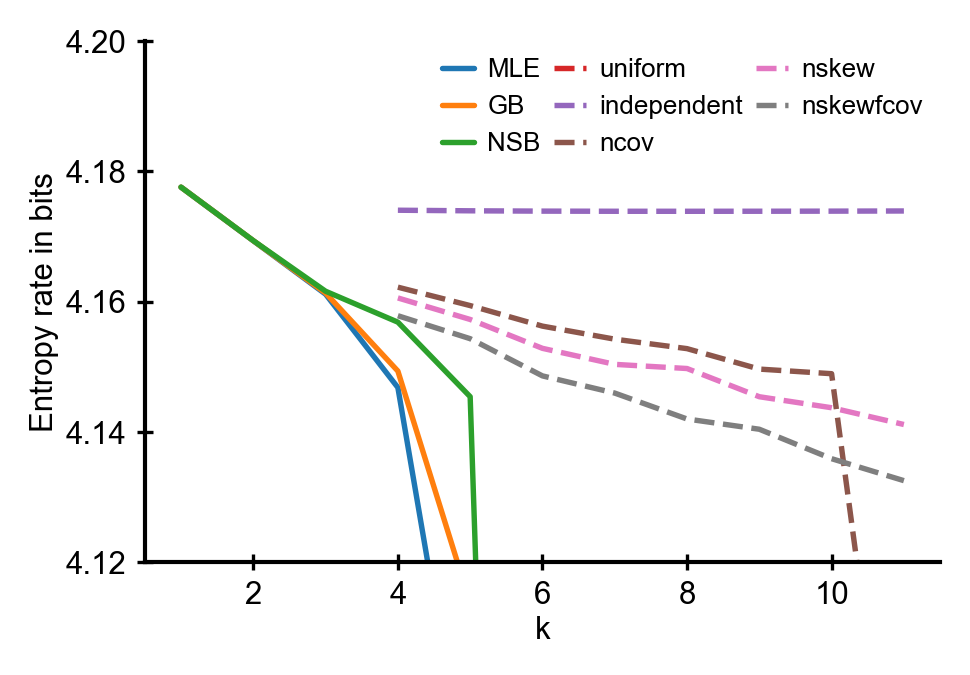

In [50]:
plt.plot(ks, entropies/ks, label='MLE')
plt.plot(ks, entropies_gb/ks, label='GB')
plt.plot(ks, entropies_nsb/ks, label='NSB')
#plt.plot(ks, min_entropies/ks, label='lower bound')
for model in models:
    plt.plot(ks_model, np.log2(np.exp(1))*entropies_all[model]/ks_model, label=model, ls='--')
plt.legend(ncol=3)
plt.xlabel('k')
plt.ylabel('Entropy rate in bits')
plt.ylim(4.12, 4.2)